In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from imutils import paths
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
import tensorflow as tf
from keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/Dataset/cnn")
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Dataset/cnn/Dataset - Plant-seedlings-classification.zip', 'r') as z:
  z.extractall()

## **1. Import the data and train / test split :**


In [ ]:
train = '/content/drive/MyDrive/Dataset/cnn/train'
data = []
labels = []

for i in os.listdir(train):
  print(i)
  for j in os.listdir(train+'/'+ i):
    dummy = cv2.imread(train+'/'+ i +"/"+ j)
    dummy = cv2.resize(dummy,(128,128))
    data.append(dummy)
    labels.append(i)

Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet


In [ ]:
 Labels=pd.DataFrame(labels)
 replace_values ={'Shepherds Purse':0,'Maize':1,'Fat Hen':2,'Loose Silky-bent':3,'Common Chickweed':4,'Common wheat':5,
'Scentless Mayweed':6,'Small-flowered Cranesbill':7,'Sugar beet':8,'Cleavers':9,'Black-grass':10,'Charlock':11}

labels_con = Labels.replace(replace_values)

class_names = {0:'Shepherds Purse',1:'Maize',2:'Fat Hen',3:'Loose Silky-bent',4:'Common Chickweed',5:'Common wheat',6:'Scentless Mayweed',
               7:'Small-flowered Cranesbill',8:'Sugar beet',9:'Cleavers',10:'Black-grass',11:'Charlock'}

In [ ]:
print(Labels)
print(labels_con)

                0
0     Black-grass
1     Black-grass
2     Black-grass
3     Black-grass
4     Black-grass
...           ...
4745   Sugar beet
4746   Sugar beet
4747   Sugar beet
4748   Sugar beet
4749   Sugar beet

[4750 rows x 1 columns]
       0
0     10
1     10
2     10
3     10
4     10
...   ..
4745   8
4746   8
4747   8
4748   8
4749   8

[4750 rows x 1 columns]


In [ ]:
Test= '/content/drive/MyDrive/Dataset/cnn/test'
x_test = []
filenames = []
for img_file in os.listdir(Test):
        filenames.append(img_file)

for k in os.listdir(Test):
    dummy = cv2.imread(Test+'/'+ k )
    dummy = cv2.resize(dummy,(128,128))
    x_test.append(dummy)    

In [ ]:
from sklearn.utils import shuffle
X, Y = shuffle(data, labels_con, random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### **Analyse the dimensions of the data.**

In [ ]:
print (X_train[0].shape)
print (y_train[0].shape)
print (X_test[0].shape)
print (y_test[0].shape)
print (x_test[0].shape)

(128, 128, 3)
(3325,)
(128, 128, 3)
(1425,)
(128, 128, 3)


In [ ]:
X_train=np.array(X_train,dtype='float32')
X_test=np.array(X_test,dtype='float32')
test_x = np.array(x_test,dtype='float32')
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)
print (test_x.shape)

(3325, 128, 128, 3)
(3325, 1)
(1425, 128, 128, 3)
(1425, 1)
(794, 128, 128, 3)


### **Visualise the data.**

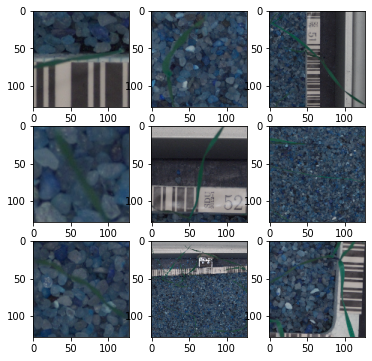

In [ ]:
images = data[:9]
labels = labels[:9]

fig, axes = plt.subplots(3, 3, figsize=(2*3,2*3))
for i in range(9):
    ax = axes[i//3, i%3]
    ax.imshow(images[i], cmap='gray')
plt.show()

In [ ]:
X_train /= 255
X_test /= 255
test_x /= 255

Y_train= tf.keras.utils.to_categorical(y_train,num_classes=12)
Y_test = tf.keras.utils.to_categorical(y_test,num_classes=12)

In [ ]:
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)


## **2. Train tune and test AIML image classifier model using:**

# **Use CNN for training**

In [ ]:
model = Sequential()
    
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2, 2))
     
model.add(Conv2D(64, (3,3), activation='relu'))# The second convolution
model.add(MaxPooling2D(2,2))
model.add(Dropout(rate=0.10))
    
model.add(Conv2D(64, (3,3), activation='relu'))# The third convolution
model.add(MaxPooling2D(2,2))

    
model.add(Flatten()) # Flatten the results to feed into a DNN
    
model.add(Dense(512, activation='relu'))# hidden layer
model.add(BatchNormalization()) #adding batch normalization

  
model.add(Dense(12, activation='softmax'))# 12 output neurons for the 12 classes of Seedling Images
    
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=["accuracy"])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0

In [ ]:
history = model.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs=20,batch_size=32)

Epoch 1/20
104/104 [==============================] - 35s 52ms/step - loss: 1.9195 - accuracy: 0.3648 - val_loss: 2.0942 - val_accuracy: 0.1691
Epoch 2/20
104/104 [==============================] - 4s 42ms/step - loss: 0.9819 - accuracy: 0.6779 - val_loss: 1.4998 - val_accuracy: 0.5179
Epoch 3/20
104/104 [==============================] - 4s 42ms/step - loss: 0.7053 - accuracy: 0.7579 - val_loss: 1.2213 - val_accuracy: 0.6119
Epoch 4/20
104/104 [==============================] - 4s 41ms/step - loss: 0.5045 - accuracy: 0.8319 - val_loss: 1.6508 - val_accuracy: 0.4842
Epoch 5/20
104/104 [==============================] - 4s 41ms/step - loss: 0.3435 - accuracy: 0.8913 - val_loss: 0.8349 - val_accuracy: 0.7432
Epoch 6/20
104/104 [==============================] - 4s 41ms/step - loss: 0.2212 - accuracy: 0.9361 - val_loss: 1.0530 - val_accuracy: 0.7298
Epoch 7/20
104/104 [==============================] - 4s 41ms/step - loss: 0.1552 - accuracy: 0.9569 - val_loss: 1.3551 - val_accuracy: 0.626

In [ ]:
CNN = model.evaluate(X_test, Y_test)

45/45 [==============================] - 1s 14ms/step - loss: 1.1689 - accuracy: 0.7326


In [ ]:
y_pred = np.argmax(model.predict(X_test),axis=1)
y_pred

array([ 6,  6,  3, ...,  3,  7, 11])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print('-'*100)
print(classification_report(y_test, y_pred))

[[ 32   0   1   0   4   1  13   9   0   2   0   2]
 [  0  52   3   2   1   0   4   1   4   0   0   3]
 [  1   2 119   9   0   1   2   3   1   1   2   0]
 [  0   0   4 126   0  19  12   3   1   1  30   0]
 [  3   0   1   4 150   1  23  10   1   2   0   0]
 [  0   0   2   2   1  50   2   1   1   5   4   1]
 [  5   1   3   1   1   1 128   1   2   2   1   3]
 [  2   1   0   3   2   0   3 141   1   0   1   2]
 [  1   3   2   1   0   8  10   5  63   1   1  17]
 [  0   0   0   0   2   1   6   4   0  72   1   6]
 [  0   0   6  33   1  10   3   1   1   0  17   0]
 [  3   0   2   0   0   0   3   3   0   4   0  94]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.50      0.58        64
           1       0.88      0.74      0.81        70
           2       0.83      0.84      0.84       141
           3       0.70      0.64      0.67       196
           4   

actual is [6] and predited label is 6


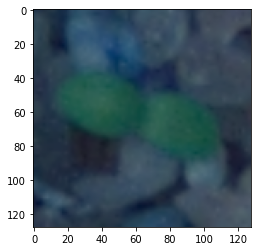

actual is [6] and predited label is 6


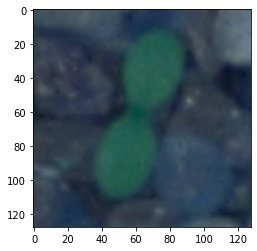

actual is [3] and predited label is 3


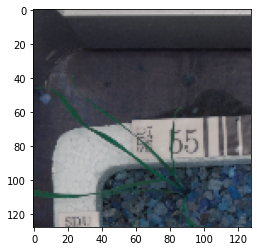

actual is [2] and predited label is 2


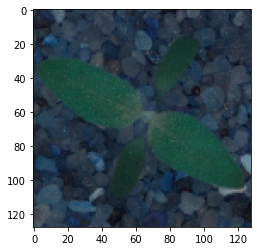

actual is [8] and predited label is 8


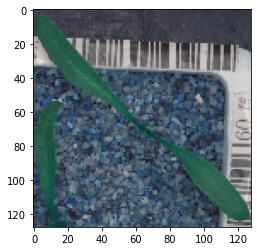

actual is [3] and predited label is 3


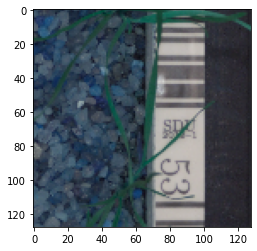

actual is [3] and predited label is 3


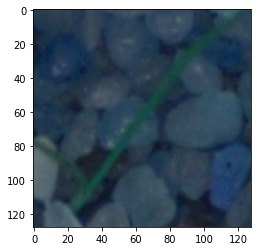

actual is [0] and predited label is 0


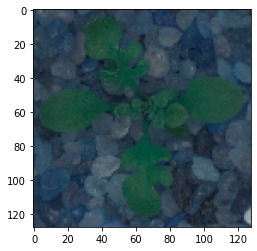

actual is [8] and predited label is 8


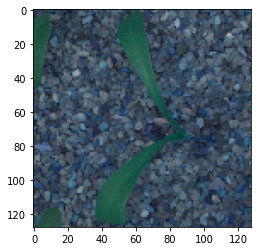

actual is [4] and predited label is 6


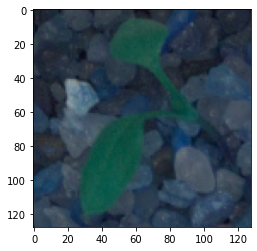

In [ ]:
  for i in range(10):
    label = y_pred[i]
    actual = y_test[i]
    img = X_test[i]
    print('actual is {} and predited label is {}' .format(actual,label) )
    plt.imshow(img);
    plt.show()

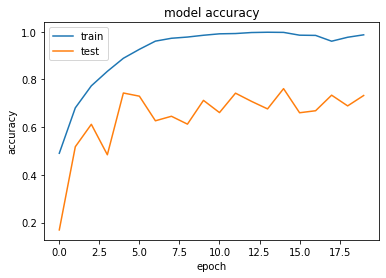

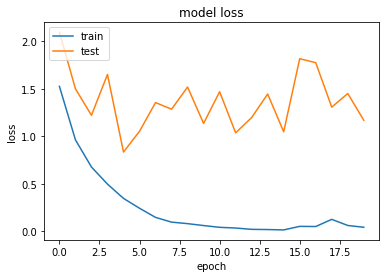

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Use supervised learning algorithms for training**

In [ ]:
X_train_2D= np.array(X).reshape(len(X),-1)
Y_train_2D= np.array(Y).reshape(len(Y))

from sklearn.model_selection import train_test_split
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X_train_2D, Y_train_2D, test_size=0.3, random_state=42)

In [ ]:
print (X_TRAIN.shape)
print (X_TEST.shape)
print (Y_TRAIN.shape)
print (Y_TEST.shape)

(3325, 49152)
(1425, 49152)
(3325,)
(1425,)


**Image Classification using SVM Algorithm**

**SVM with CNN**

In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

## By aading kernel_regularizer & loss output layer converted to SVM

cnn.add(Dense(12, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

r=cnn.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs=20,batch_size=32)

Epoch 1/20
104/104 [==============================] - 3s 21ms/step - loss: 1.2964 - accuracy: 0.1942 - val_loss: 1.1471 - val_accuracy: 0.3811
Epoch 2/20
104/104 [==============================] - 2s 16ms/step - loss: 1.1308 - accuracy: 0.4036 - val_loss: 1.0985 - val_accuracy: 0.4849
Epoch 3/20
104/104 [==============================] - 2s 16ms/step - loss: 1.0899 - accuracy: 0.4944 - val_loss: 1.0849 - val_accuracy: 0.4912
Epoch 4/20
104/104 [==============================] - 2s 15ms/step - loss: 1.0692 - accuracy: 0.5633 - val_loss: 1.0641 - val_accuracy: 0.5719
Epoch 5/20
104/104 [==============================] - 2s 16ms/step - loss: 1.0495 - accuracy: 0.6233 - val_loss: 1.0545 - val_accuracy: 0.6049
Epoch 6/20
104/104 [==============================] - 2s 16ms/step - loss: 1.0430 - accuracy: 0.6381 - val_loss: 1.0443 - val_accuracy: 0.6344
Epoch 7/20
104/104 [==============================] - 2s 15ms/step - loss: 1.0322 - accuracy: 0.6859 - val_loss: 1.0474 - val_accuracy: 0.6168

**Image Classification using SVM Algorithm**

In [ ]:
from sklearn.svm import SVC
SVM = SVC(C=0.9, kernel='linear')
SVM.fit(X_TRAIN,Y_TRAIN)

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score

train_SVM_pred = SVM.predict(X_TRAIN)
Train_SVM = accuracy_score(Y_TRAIN,train_SVM_pred)
print ('Train Accuracy:',Train_SVM)

y_pred_SVM = SVM.predict(X_TEST)
acc_SVM = accuracy_score(Y_TEST,y_pred_SVM)
print ('Test Accuracy:',acc_SVM)

Train Accuracy: 1.0
Test Accuracy: 0.4743859649122807


**Image Classification using KNN Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_TRAIN,Y_TRAIN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [ ]:
train_knn_pred = knn.predict(X_TRAIN)
Train_knn = accuracy_score(Y_TRAIN,train_knn_pred)
print ('Train Accuracy:',Train_knn)

y_pred_knn = knn.predict(X_TEST)
acc_knn = accuracy_score(Y_TEST,y_pred_knn)
print ('Test Accuracy:',acc_knn)

Train Accuracy: 0.3368421052631579
Test Accuracy: 0.24350877192982456


**Image Classification using Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
dt.fit(X_TRAIN,Y_TRAIN)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
train_DT_pred = dt.predict(X_TRAIN)
Train_DT = accuracy_score(Y_TRAIN,train_DT_pred)
print ('Train Accuracy:',Train_DT)

y_pred_DT = dt.predict(X_TEST)
acc_DT = accuracy_score(Y_TEST,y_pred_DT)
print ('Test Accuracy:',acc_DT)

Train Accuracy: 0.26526315789473687
Test Accuracy: 0.24771929824561403


# **Use neural networks for training**

**Image Classification using Artificial Neural Networks**

In [ ]:
model_ann = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(128, 128, 3)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(12, activation='softmax')
])
model_ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_ann.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               24576500  
_________________________________________________________________
dense_5 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_7 (Dense)              (None, 12)                1212      
Total params: 24,728,062
Trainable params: 24,728,062
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model_ann.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs=20,batch_size=32)
history1

Epoch 1/20
104/104 [==============================] - 3s 20ms/step - loss: 8.1576 - accuracy: 0.1117 - val_loss: 2.5238 - val_accuracy: 0.2260
Epoch 2/20
104/104 [==============================] - 2s 17ms/step - loss: 2.4682 - accuracy: 0.1880 - val_loss: 2.4269 - val_accuracy: 0.2772
Epoch 3/20
104/104 [==============================] - 2s 17ms/step - loss: 2.1475 - accuracy: 0.2496 - val_loss: 2.1435 - val_accuracy: 0.2526
Epoch 4/20
104/104 [==============================] - 2s 17ms/step - loss: 1.9736 - accuracy: 0.3069 - val_loss: 2.0716 - val_accuracy: 0.2526
Epoch 5/20
104/104 [==============================] - 2s 17ms/step - loss: 1.8658 - accuracy: 0.3312 - val_loss: 1.8892 - val_accuracy: 0.3411
Epoch 6/20
104/104 [==============================] - 2s 17ms/step - loss: 1.7555 - accuracy: 0.3760 - val_loss: 1.8978 - val_accuracy: 0.3123
Epoch 7/20
104/104 [==============================] - 2s 18ms/step - loss: 1.6663 - accuracy: 0.3957 - val_loss: 1.7583 - val_accuracy: 0.3712

In [ ]:
ANN = model_ann.evaluate(X_test, Y_test)

45/45 [==============================] - 0s 7ms/step - loss: 1.8534 - accuracy: 0.4365


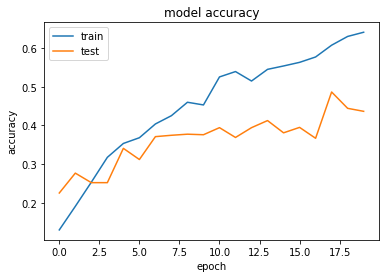

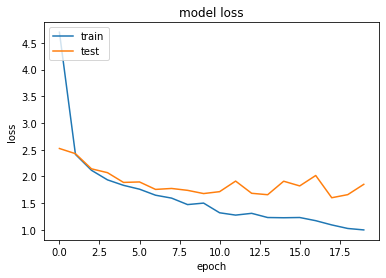

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **3. Compare the results from the above step along with your detailed observations.**

In [ ]:
compare = [[acc_SVM],[acc_knn],[acc_DT],[ANN[1]],[CNN[1]]]
pd.DataFrame(compare, columns= ['Accuracy'], index = ['SVM','KNN','DT','ANN','CNN'] )

,Accuracy
SVM,0.474386
KNN,0.243509
DT,0.247719
ANN,0.436491
CNN,0.732632


**Observation** :
1. As per above comparison CNN works best for this Image classification.
2. CNN takes fewer parameters to learn which reduces the chances of overfitting. also CNN takes less time to train the parameters as compare to supervised learning algorithms for training.
3. as CNN extracts features from the images it works effectively for Images classification dataset.


### **4. Pickle the best performing model.**

In [ ]:
model.save('/content/drive/MyDrive/saved_model/best_acc.h5')

In [ ]:
saved_model=load_model('/content/drive/MyDrive/saved_model/best_acc.h5')

### **5. Import the the image in the “ Prediction” folder to predict the class. Display the image. Use the best trained image classifier model to predict the class.**

In [ ]:
Prediction=saved_model.predict(test_x)
predict=np.argmax(Prediction,axis=1)
predict

array([ 7,  2,  8,  4,  8,  3,  4,  2,  3,  3,  2,  7,  8,  6,  8,  2,  6,
        6,  4,  9,  7,  7,  6,  5,  8,  1,  8,  6,  4,  8,  4,  0,  3,  6,
        3,  3,  4,  3,  4,  1,  7,  5,  4,  7,  6,  6,  7,  6,  1,  7,  3,
        8,  9,  3,  1,  2, 11,  7,  9,  3,  8,  9, 11,  5,  1,  2,  2,  6,
       11,  6,  7,  4,  6,  4,  3,  5,  3,  6,  6,  3,  8,  4,  4,  5,  0,
        9,  9,  0,  2, 10, 11,  3,  2,  3,  4,  3,  7,  0,  1, 11,  2,  2,
        6,  8,  2,  2,  4,  6,  9,  9,  3, 11,  4,  0,  0,  5,  9, 11,  8,
        4,  3,  8,  9, 10,  7,  9, 11,  1,  2,  4,  8,  8,  4,  9,  2,  5,
        2, 11,  6,  4,  3,  7,  0,  4,  2,  8,  5,  7,  5, 11,  6,  3,  1,
        8,  3,  7,  4,  3,  3,  9, 11,  3,  6,  6,  0,  3,  0,  5,  0,  4,
        0,  1,  0,  4,  4,  7,  5,  9,  3,  3,  3,  7,  3,  6,  6,  6,  4,
        2,  2,  7,  3, 11,  6,  6, 11, 10,  5,  4,  3,  6,  9,  5, 11, 11,
        7,  9,  2,  4,  9,  0,  3, 11,  2,  3,  7,  9,  1,  3,  7,  4,  6,
        6,  4,  7,  5,  5

In [ ]:
prediction = []
for img in test_x:
    img_obj = np.expand_dims(img, axis=0)
    img_obj_class = saved_model.predict(img_obj)
    img_obj_class = np.argmax(img_obj_class,axis=1)
    img_obj_class = class_names.get(img_obj_class[0], np.nan)
    prediction.append(img_obj_class)
    pass
predictions = pd.DataFrame({"file":filenames,"species":prediction})
predictions.to_csv('submission.csv', index = False)
predictions.head(10)

,file,species
0,0021e90e4.png,Small-flowered Cranesbill
1,003d61042.png,Fat Hen
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Common Chickweed
4,00c47e980.png,Sugar beet
5,00d090cde.png,Loose Silky-bent
6,00ef713a8.png,Common Chickweed
7,01291174f.png,Fat Hen
8,026716f9b.png,Loose Silky-bent
9,02cfeb38d.png,Loose Silky-bent


predited label is 7


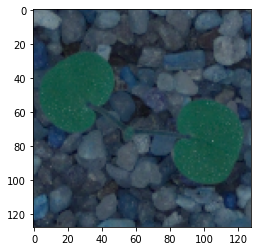

predited label is 2


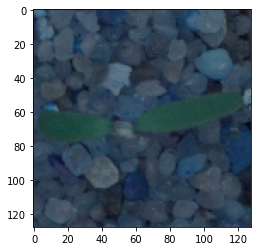

predited label is 8


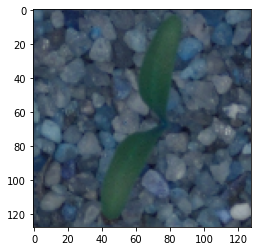

predited label is 4


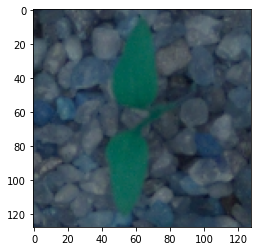

predited label is 8


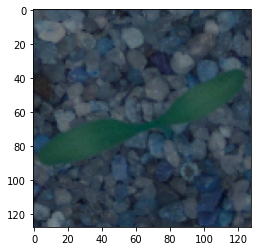

In [ ]:
  for i in range(5):
    label = predict[i]
    img = test_x[i]
    print('predited label is {}' .format(label) )
    plt.imshow(img);
    plt.show()

# **Part 2**

**Explain in depth why CNN out performs neural networks which in turn out perform supervised learning models when it comes to image classification.**

1. After comparing all the models, CNN has the highest accuracy among all alghoritms that predicts images. as CNN is very effective in reducing the number of parameters without losing on the quality of model.
2. CNN can brought automatic feature extractors from the image. CNN effectively uses adjacent pixel information to effectively downsample the image first by convolution and then uses a prediction layer at the end.so in CNN feature engineering not required.
3. CNN reduce the number of units in the network. This means, there are fewer parameters to learn which reduces the chance of overfitting as the model would be less complex than a fully connected network. so it works better than Neural Netwok for image classification.
4. Using ANN, image classification problems become difficult because 2 dimensional images need to be converted to 1 dimensional vectors. This increases the number of trainable parameters exponentially.
5. SVM are margin classifier and support different kernels to perform these classificiation. Where SVM suffer in predicting the class labels when the size of the class labels is huge. Also, it’s difficult to parallelize SVM but the CNN architecture inherently support parallelization. SVM is taking more time to run (predict the labels).

# **Part 3**

**Help to build the image dataset to be used by the AI team to build an image classifier data. Import and display the images in python against their labels. Comment on the challenges faced during this task.Hint: An image classifier data requires images as data and their tags/labels/class to which they belong.**

In [23]:
os.chdir("/content/drive/MyDrive/Dataset/cnn")
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Dataset/cnn/Dataset - Images.zip', 'r') as z:
  z.extractall()

In [24]:
Path ="/content/drive/MyDrive/Dataset/cnn/Images"
print("length of Yes_mobile images->",len(os.listdir(Path)))

length of Yes_mobile images-> 15


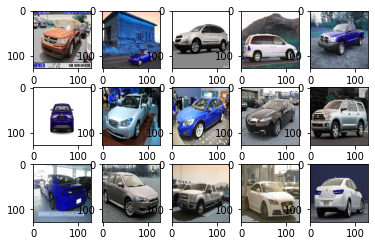

In [25]:
images = []
for k in os.listdir(Path):
  dummy = cv2.imread(Path+'/'+ k )
  dummy = cv2.resize(dummy,(128,128))
  images.append(dummy)

for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(images[i])
  
  i += 1    

In [26]:
f = []
for l in os.listdir(Path):
        f.append(l)

p = pd.DataFrame({"file":f})
p.to_csv('annotation.csv', index = False)
Labels = pd.read_csv('Car_data_labels.csv')

In [27]:
label = Labels[['color','Brand']].values.tolist()
Label_make = {'00006.jpg':['Red','Chevrolet'],'00007.jpg':['Blue','Dodge'],'00015.jpg':['Orange','volvo '],'00013.jpg':['off-white','Hyundai'],
'00004.jpg':['Red','Hyundai'],'00014.jpg':['White','dodge'],'00003.jpg':['Red','dodge Dakota'],'00009.jpg':['Gray','Mitsubishi'],
'00002.jpg':['Black','Acura TL'],'00010.jpg':['Silver','Chevrolet'],'00012.jpg':['Silver','Toyota'],'00008.jpg':['Red','Dodge'],
'00005.jpg':['White','Ford F-450'],'00001.jpg':['White','Audi'],'00011.jpg':['White','Buick Verano']}

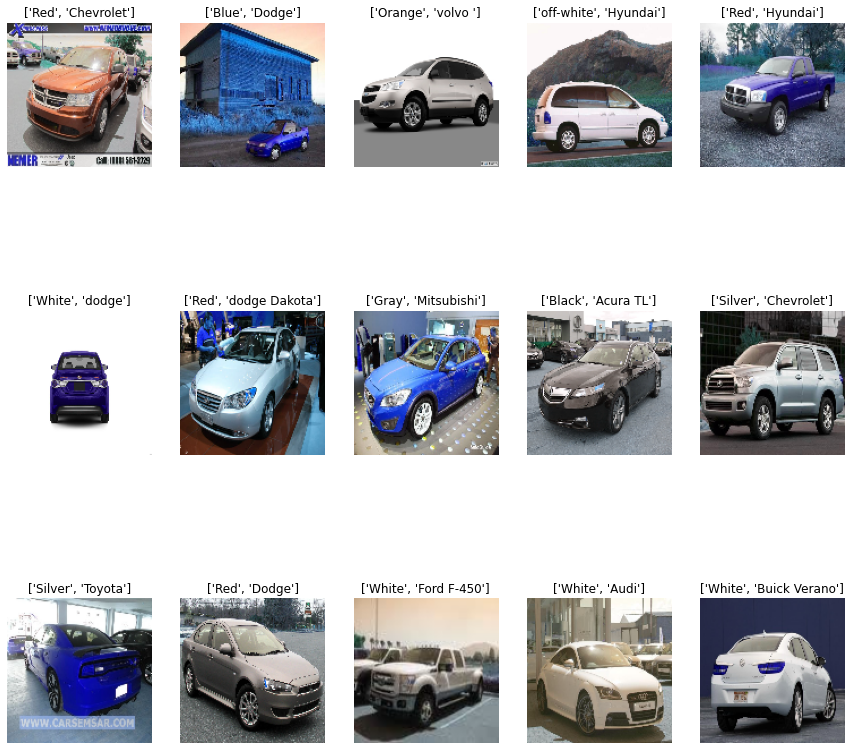

In [28]:
import matplotlib.pyplot as plt 
import seaborn as sns

N=15  

plt.figure(figsize=(N, N))
for i in range(N):
    plt.subplot(3, 5, i+1)
    plt.imshow(images[i], cmap="gray")

    plt.title("{}".format(label[i]))
    plt.axis('off')
plt.show()
i += 1
